<hr style="height:1px; width:100%">

<h1 style="color:#336699">TASK 02P: Working with numpy Vectors</h1>

<p style="color:#204060; font-size:16px";>
    Created by: &emsp;&emsp;&emsp; Mick Wiedermann<br>
    Student Number: &ensp;2220-58299<br>
    Email Address: &emsp;&ensp; mwiedermann@deakin.edu.au<br><br>
    <i>Computer Science Undergraduate - Data Science Major</i>
</p>

<hr style="height:1px; width:100%">


<p style="color:#336699; font-size:16px";><i>Importing the required modules</i></p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 1 & 2: Downloading & Importing the Data</h2>

<p style="color:#204060; font-size:16px" >
    <ul style="color:#204060; font-size:16px";>
        <li>Loading the BTC to USD data downloaded from yahoo finance using the <i>numpy.loadtext()</i> function:</li>
    </ul>
</p>

In [2]:
rates = np.loadtxt("BTC-USD_close_values.csv")

<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 3: Visualising the Data</h2>

<p style="color:#204060; font-size:16px" >
    <ul style="color:#204060; font-size:16px";>
        <li>Using Matplotlib to draw the data as a function of the day number as a black dashed line:</li>
    </ul>
</p>

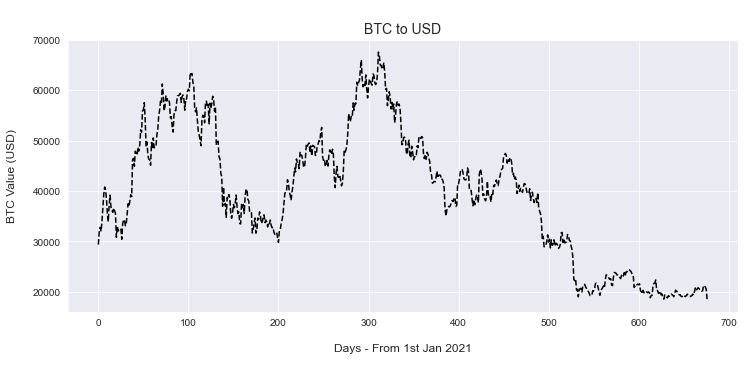

In [3]:
sns.set_style('darkgrid') # Setting the style of the plot. 
plt.figure(figsize=(12,5)) # Adjusting the image size 
plt.plot(rates, linestyle='--', color='black') # Setting the line style and colour
plt.xlabel('\nDays - From 1st Jan 2021\n', size=12) # x-axis label
plt.ylabel('BTC Value (USD)\n', size=12) # y-axis label
plt.title("\nBTC to USD", size=14); 

<p style="color:#204060; font-size:16px; page-break-after: always">
    Above we can see the volatile nature of the Bitcoin value against the US Dollar over the last 680 days. We can see that Bitcoin's price peaked towards the end of 2021 at around \$68,000 USD then falling to around \$40,000 USD for around 100 days before crashing to it's current value of \$20,000 USD.
</p>



<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 4: Examining the Key Metrics</h2>

<p style="color:#204060; font-size:16px" >
    <ul style="color:#204060; font-size:16px";>
        <li>Determining the following key metrics for the first 365 days of the data with built in numpy functions:</li>
        <ul style="color:#204060; font-size:16px";>
            <li>Arithmetic Mean</li>
            <li>Median</li>
            <li>Maximum Value</li>
            <li>Minimum Value</li>
            <li>Standard Deviation</li>
            <li>Interquartile Range</li>
        </ul>
    </ul>
</p>

In [4]:
# Creating a new variable to hold the first 365 days of data.
rates_365 = rates[:365]    

# Utilising the built in Numpy functions to calculate the key metrics & print the output. 
print(f'The key metircs for the first 365 days.\n\nMean:\t\t${np.mean(rates_365):,.2f}')
print(f'Median:\t\t${np.median(rates_365):,.2f}')
print(f'Maximun Value:\t${np.max(rates_365):,.2f}')
print(f'Minumum Value:\t${np.min(rates_365):,.2f}')
print(f'Standard Deviation:  ${np.std(rates_365):,.2f}')
print(f'Interquartile Range: ${(np.quantile(rates_365, 0.75) - np.quantile(rates_365, 0.25)):,.2f}')

The key metircs for the first 365 days.

Mean:		$47,436.93
Median:		$47,783.36
Maximun Value:	$67,566.83
Minumum Value:	$29,374.15
Standard Deviation:  $9,774.22
Interquartile Range: $17,869.12


<p style="color:#204060; font-size:16px" >
    Reviewing the key metrics, we see that the <b>maximum</b> price for the period reached \$67,566.83 and the <b>minimum</b> \$29,374.15, both of which are easily approximated from the plot above. Not surprisingly, with minimum and maximum values so different, the <b>standard deviation</b> of \$9,774.22 confirms a large amount of variability of the BTC price over the period. The <b>interquartile range</b> being close to twice the value of the standard deviation reaffirms the variability and indicates symmetry of the data as skewed data would show no relationship between the two metrics. 
    
</p>

<p style="color:#204060; font-size:16px" >
    The small distance between the <b>mean</b> and the <b>median</b> tells us that for the period, the price has a symmetrical distribution. This is typical of a normal distribution but isn't something we would expect from market data, it's also not immediately obvious when looking at the price movement plot above. To better understand how this could be the case, lets generate at a frequency distribution of the data below. 
</p>

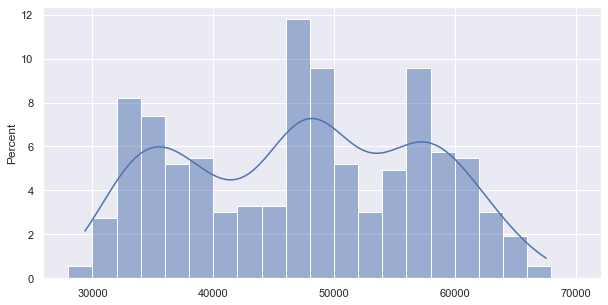

In [5]:
# Utilising Seaborn.histplot to visulise the frequency distribution.

sns.set(rc = {'figure.figsize':(10,5)}) # Setting the plot size.
sns.histplot(data=rates_365, binwidth=2000, binrange=(28000,70000), 
             stat="percent", kde=True); # Defining the parameters of the plot. 

<p style="color:#204060; font-size:16px" >
    Here we can clearly see a trimodal distribution which is quite symmetrical and explains why our metrics were indicating symmetry even though the data isn't normally distributed.
</p><br>

<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 5: Highest & Lowest Value Days</h2>

<p style="color:#204060; font-size:16px" >
    <ul style="color:#204060; font-size:16px";>
        <li>Finding the days with the highest and lowest BTC values:</li>
    </ul>
</p>

In [6]:
min_day = np.where(rates_365 == np.min(rates_365))
max_day = np.where(rates_365 == np.max(rates_365))

# Adding 1 to the results so the first day is 1 and not 0. 
min_day = int(min_day[0]+1)
max_day = int(max_day[0]+1)

# Converting the day-number and year to a datetime object.
min_date = datetime.strptime('2021' + "-" + str(min_day), "%Y-%j")
max_date = datetime.strptime('2021' + "-" + str(max_day), "%Y-%j")

# Using the datetime object to extract meaningful information. 
print(f'\nThe day with the highest BTC value occured on day {max_day}'
      + f', which was {max_date.strftime("%A the %d/%m/%Y")}. '
      + f'\nThe day with the lowest BTC value occured on day {min_day},' 
      + f' which was {min_date.strftime("%A the %d/%m/%Y")}.')


The day with the highest BTC value occured on day 312, which was Monday the 08/11/2021. 
The day with the lowest BTC value occured on day 1, which was Friday the 01/01/2021.


<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 6: Boxplot Visualisation</h2>

<p style="color:#204060; font-size:16px" >
    <ul style="color:#204060; font-size:16px";>
        <li>Visualising the 2021 daily price increases and decreases with a boxplot utilising the <i>numpy.diff</i> function:</li>
    </ul>
</p>

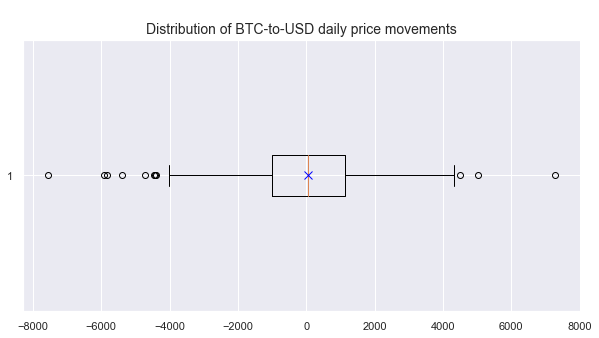

In [7]:
# Creating a dict to add and style a marker for the mean point. 
meanpoint = dict(marker='x', markeredgecolor='blue', markersize=8)

sns.set_style("darkgrid") # Setting the style of the plot.
plt.figure(figsize=(10,5)) # Setting the size of the plot. 
plt.boxplot(np.diff(rates_365), vert=False, showmeans=True, meanprops=meanpoint)
plt.title("\nDistribution of BTC-to-USD daily price movements", size=14);

<p style="color:#204060; font-size:16px" >
    Reviewing the above boxplot which represents the daily price movements of BTC in USD, we can see that the daily price movements are symmetrically distributed. This is indicated by the location of the mean line being at the centre of the box as well as the similarity in whisker length.
</p>

<p style="color:#204060; font-size:16px" >
    The box which indicates the interquartile range (IQR), tells us that around 50% of the daily price movements (up and down) were between \$0 and approximately \$1,000 USD. The whiskers representing the other 50% (approximately) shows a variability of between \$1,000 and \$4,000 USD.      
</p>

<p style="color:#204060; font-size:16px" >
    There are a handful of outliers in our data which are defined as being to far from the central values to be reasonable. It would be a fair assumption to assume that these days represented by the outliers are days of intense panic selling and buying emotionally driven, beyond what is logically reasonable. Likley a result of positive and negative media attention.     
</p>

<p style="color:#204060; font-size:16px" >
    As it is a little hard to determine the number of outliers, let's write a little code to count them for us. First we need to create a variable to store the price difference vector, let's call that <i>diff_365</i>. Then we need to calculate the IQR of the daily price differences which we can use the <i>numpy.quantile</i> function to do. Lastly, we need to count or capture each value that is either 1.5 times the IQR above or below our upper and lower quartiles respectively.      
</p>


In [8]:
diff_365 = np.diff(rates_365) # Storeing the price difference vector
iqr = (np.quantile(diff_365, 0.75) - np.quantile(diff_365, 0.25)) # Calc the IQR
outliers = [] # Empty list to capture out outliers. 

for rate in diff_365: # Looping through each element.
    if rate > ((1.5 * iqr) + np.quantile(diff_365, 0.75)):
        outliers.append(rate)
    elif rate < ((-1.5 * iqr) + np.quantile(diff_365, 0.25)):
        outliers.append(rate)

print(f'Number of outliers: {len(outliers)}\n')
outliers = np.sort(outliers) # Sorting the outliers for better output.

for outlier in outliers:
    if outlier > 0: # formatting the output
        print(f' {outlier:.2f}')
    else:
        print(f'{outlier:.2f}')

Number of outliers: 11

-7554.04
-5906.96
-5822.41
-5382.89
-4722.05
-4467.64
-4416.42
-4397.54
 4493.47
 5017.50
 7293.02


<p style="color:#204060; font-size:16px" >
    Here we have our eleven outliers, far more dramatic price decreases than increases which is interesting. Maybe it tells us a little something about the strength of the fear motive compared to the strength of the greed motive. Of course we have no where near enough data to draw a conclusion like this but we can speculate.       
</p>

<hr style="height:1px; width:100%">
<br>
<h3> References </h3>
<p>
    <ul>
        <li>Matplotlib Documentation: 
            <a href="https://matplotlib.org/stable/tutorials/introductory/index.html">matplotlib.org</a></li>
        <li>Minimalist Data Wrangling by Dr Marek Gagolewski: 
            <a href="https://datawranglingpy.gagolewski.com/chapter/210 vector.html">datawrangling.gagolewski.com</a></li>
        <li>Seaborn Documentation: 
            <a href="https://seaborn.pydata.org/tutorial/aesthetics.html">seaborn.aesthetics</a></li>
    </ul>